!conda create -n deep-learning -y python=3.11

!conda activate deep-learning

!pip install scikit-learn

!pip install tensorflow

!conda install -y matplotlib pandas

In [27]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [28]:
import sklearn
import tensorflow as tf
from tensorflow import keras

In [29]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Nos trae divididas las X de las Y

In [30]:
X = housing.data
y = housing.target

In [53]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [31]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full)

In [32]:
len(X_train)

11610

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.70426162,  1.20940508, -0.16719423, ...,  0.02727911,
        -0.80299545,  0.65892505],
       [-0.33559771,  0.89324033, -0.53455137, ..., -0.08894193,
        -0.69055322,  0.63400085],
       [ 0.48904802,  0.57707557,  0.241347  , ..., -0.024643  ,
        -0.66712775,  0.61406149],
       ...,
       [-0.12742288, -1.24087178,  0.02768153, ..., -0.0146155 ,
         0.45729451,  0.05575937],
       [-0.81256128, -1.0827894 ,  0.03193569, ...,  0.02090444,
        -1.38394695,  2.03972583],
       [ 0.46022463, -1.95224248, -0.06842147, ..., -0.05057165,
        -0.92480786,  0.94804579]])

In [35]:
import numpy as np


np.random.seed(42)
tf.random.set_seed(42)

In [36]:
# Los valores son muy parejos, por lo que no haremos un Scaler

y_train

array([0.959, 2.436, 3.022, ..., 1.083, 0.912, 2.374])

In [37]:
# Va ser muy común para ver lo que tenemos de forma del tensor

X_train.shape

(11610, 8)

## Tres formas de crear modelos de Redes con Keras

### 1º Van ser capas secuenciales donde añadiremos a la lista las capas que tengamos

In [38]:
# 1º Capa | Será una tupla de como tiene 8 columnas será de (8)
# 2º Capa | Le vamos a dar 30 neuronas y con función de activación Relu
# 3º Capa | Queremos los valores de la salida actual en este caso, ya que la linealidad ya está rota


# Capa de activación

# Sigmoide si el valor oscila entre el 0 y 1 True or False
# Tangente hiperbólica entre -1 y 1
# ReLu, la más utilizada


lista_de_capas=[
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(30,activation="relu"),
    #keras.layers.Dense(30,activation="relu",iput_shape=(8,)), significa que hay antes una capa de entrada que le entran 8 por lo que nos ahorraríamos la primera línea (Input)
    keras.layers.Dense(1)
]

model = keras.models.Sequential(lista_de_capas)
#model = keras.Sequential(lista_de_capas)

In [39]:
model

<Sequential name=sequential_1, built=True>

In [40]:
# Compilamos el modelo actual, con la función de error que va utilizar, muchas veces nos la inventamos, pero si ya tiene una y le funciona bien vamos con el
# Le decimos que como optimizador utilice el Descenso del Gradiente, el cual podemos indicarle el Lr(Learning-Rate)
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.002))

In [41]:
# Nos enseña su estado actual

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Datos de validación y las vueltas que recorre

history = model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
121/363 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 2.2578 

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3921 - val_loss: 0.5702
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.5319 - val_loss: 0.4830
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4688 - val_loss: 0.4683
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.4564 - val_loss: 0.4555
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.4421 - val_loss: 0.4512
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.4366 - val_loss: 0.4432
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.4272 - val_loss: 0.4409
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4230 - val_loss: 0.4342
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.4159 - val_loss: 0.4322
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.4128 - val_loss: 0.4262
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.4068 - val_loss: 0.4229
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 948

In [43]:
history.history

{'loss': [0.8021470308303833,
  0.499166876077652,
  0.4534391164779663,
  0.4433758854866028,
  0.4311109483242035,
  0.4255780875682831,
  0.4176846742630005,
  0.4129749536514282,
  0.40685588121414185,
  0.40310749411582947,
  0.397941529750824,
  0.39396435022354126,
  0.39010125398635864,
  0.38671615719795227,
  0.38384515047073364,
  0.38139045238494873,
  0.38061001896858215,
  0.3794378340244293,
  0.3740943968296051,
  0.37086156010627747,
  0.3684523403644562,
  0.3663942515850067,
  0.3643864095211029,
  0.36241254210472107,
  0.3605211675167084,
  0.35878342390060425,
  0.357063889503479,
  0.3556072413921356,
  0.35445499420166016,
  0.3533673584461212],
 'val_loss': [0.5702483057975769,
  0.4830166697502136,
  0.4682976305484772,
  0.4555225968360901,
  0.45122841000556946,
  0.4431747794151306,
  0.44088026881217957,
  0.4342034161090851,
  0.43217599391937256,
  0.42618802189826965,
  0.4228892922401428,
  0.4186597764492035,
  0.4165063798427582,
  0.4124216437339782

<Axes: >

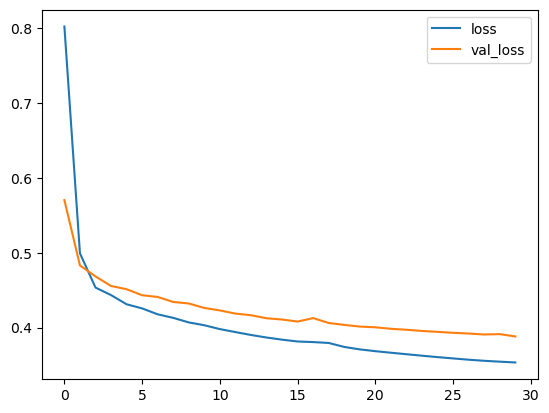

In [44]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

In [45]:
mse_test = model.evaluate(X_test,y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.3617


0.35732924938201904

In [46]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [47]:
print(y_nueva)
print(y_test[:3])

[[0.5885417]
 [1.4874614]
 [3.9202442]]
[0.477   0.458   5.00001]


In [48]:
model.save(path+"model_prueba.keras")

In [49]:
model = keras.models.load_model(path+"model_prueba.keras")